In [11]:


from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '294f4edb-19dd-450b-8b2f-1a1c14dca1ed',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-12-23T18:33:11.467Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 10451}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11849, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [23]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980018e+07,1.980018e+07,False,NaN,1,NaN,NaN,None,2024-12-23T18:29:00.000Z,93167.569578,6.155156e+10,51.2748,-0.580317,-2.969021,-13.539064,-4.873566,37.376225,46.438116,1.844734e+12,56.6520,1.956519e+12,None,2024-12-23T18:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 19:33:13.658198
1,1027,Ethereum,ETH,ethereum,9718,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204573e+08,1.204573e+08,True,NaN,2,NaN,NaN,None,2024-12-23T18:30:00.000Z,3333.841825,3.335213e+10,34.5951,-0.947482,0.232392,-17.646278,-2.720472,31.947378,26.414427,4.015854e+11,12.3282,4.015854e+11,None,2024-12-23T18:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 19:33:13.658198
2,825,Tether USDt,USDT,tether,109750,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.398483e+11,1.434401e+11,True,NaN,3,NaN,NaN,None,2024-12-23T18:30:00.000Z,0.998753,1.374575e+11,21.2842,0.010821,-0.048702,-0.148249,-0.277801,-0.054515,-0.118860,1.396739e+11,4.2894,1.432613e+11,None,2024-12-23T18:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-23 19:33:13.658198
3,52,XRP,XRP,xrp,1486,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.725238e+10,9.998681e+10,False,NaN,4,NaN,NaN,None,2024-12-23T18:30:00.000Z,2.174931,1.087755e+10,-2.1121,-0.560397,-3.017188,-12.057238,46.995445,309.382679,270.373777,1.245200e+11,3.8240,2.174931e+11,None,2024-12-23T18:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 19:33:13.658198
4,1839,BNB,BNB,bnb,2315,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440076e+08,1.440076e+08,False,NaN,5,NaN,NaN,None,2024-12-23T18:30:00.000Z,682.131095,1.668014e+09,52.3072,-0.293567,3.823664,-5.805013,3.840868,15.129911,12.274113,9.823205e+10,3.0167,9.823205e+10,None,2024-12-23T18:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 19:33:13.658198
5,5426,Solana,SOL,solana,813,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.794573e+08,5.907961e+08,True,NaN,6,NaN,NaN,None,2024-12-23T18:30:00.000Z,185.405281,4.588853e+09,6.4111,-0.108418,1.391755,-15.325375,-27.761322,5.674285,26.236199,8.889392e+10,2.7299,1.095367e+11,None,2024-12-23T18:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 19:33:13.658198
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.473228e+11,1.473228e+11,True,NaN,7,NaN,NaN,None,2024-12-23T18:30:00.000Z,0.312004,4.180356e+09,-2.5481,-0.624545,-2.107190,-23.986408,-27.386782,121.825330,186.020781,4.596522e+10,1.4116,4.596522e+10,None,2024-12-23T18:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 19:33:13.658198
7,3408,USDC,USDC,usd-coin,24099,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.306732e+10,4.306732e+10,False,NaN,8,NaN,NaN,None,2024-12-23T18:30:00.000Z,0.999951,9.426971e+09,59.3916,-0.003551,-0.004159,-0.012475,0.012816,0.008970,-0.008199,4.306521e+10,1.3225,4.306521e+10,None,2024-12-23T18:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-23 19:33:13.658198
8,2010,Cardano,ADA,cardano,1418,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract..."

In [27]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '294f4edb-19dd-450b-8b2f-1a1c14dca1ed',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df   

    if not os.path.isfile(r'/Users/er3kl3/Desktop/pd/API.csv'):
        df.to_csv(r'/Users/er3kl3/Desktop/pd/API.csv', header='columns_names')
    else:
        df.to_csv(r'/Users/er3kl3/Desktop/pd/API.csv', mode='a', header=False)
    

In [29]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(5)
exit()


API runner completed
API runner completed


KeyboardInterrupt: 

In [37]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [45]:
df = pd.read_csv('/Users/er3kl3/Desktop/pd/API.csv')

In [57]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.volume_change_24h',
                               'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
                               'quote.USD.percent_change_90d']].mean()

In [63]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.28078
             quote.USD.volume_change_24h     49.11760
             quote.USD.percent_change_7d    -13.38753
             quote.USD.percent_change_30d    -4.81729
             quote.USD.percent_change_60d    37.66113
             quote.USD.percent_change_90d    46.03432
Ethereum     quote.USD.percent_change_1h     -0.51481
             quote.USD.volume_change_24h     32.09180
             quote.USD.percent_change_7d    -18.42054
             quote.USD.percent_change_30d    -3.08026
             quote.USD.percent_change_60d    31.71778
             quote.USD.percent_change_90d    25.96765
Tether USDt  quote.USD.percent_change_1h     -0.00400
             quote.USD.volume_change_24h     20.32380
             quote.USD.percent_change_7d     -0.14191
             quote.USD.percent_change_30d    -0.25033
             quote.USD.percent_change_60d    -0.05922
             quote.USD.percent_change_90

In [71]:
type(df3)

pandas.core.frame.DataFrame

In [69]:
type(df4)

pandas.core.series.Series

In [75]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.28078
            quote.USD.volume_change_24h   49.11760
            quote.USD.percent_change_7d  -13.38753
            quote.USD.percent_change_30d  -4.81729
            quote.USD.percent_change_60d  37.66113
            quote.USD.percent_change_90d  46.03432
Ethereum    quote.USD.percent_change_1h   -0.51481
            quote.USD.volume_change_24h   32.09180
            quote.USD.percent_change_7d  -18.42054
            quote.USD.percent_change_30d  -3.08026
            quote.USD.percent_change_60d  31.71778
            quote.USD.percent_change_90d  25.96765
Tether USDt quote.USD.percent_change_1h   -0.00400
            quote.USD.volume_change_24h   20.32380
            quote.USD.percent_change_7d   -0.14191
            quote.USD.percent_change_30d  -0.25033
            quote.USD.percent_change_60d  -0.05922
            quote.USD.percent_change_90d  -0.11622
XRP         quote.USD.percent_change_1h   -0.32054
            quote.USD.volume_change_24h   -3.37380
            quote.USD.percent_change_7d  -11.62336
            quote.USD.percent_change_30d  45.86201
            quote.USD.percent_change_60d 307.92911
            quote.USD.percent_change_90d 268.77712
BNB         quote.USD.percent_change_1h   -0.13129
            quote.USD.volume_change_24h   52.22080
            quote.USD.percent_change_7d   -6.09496
            quote.USD.percent_change_30d   3.49638
            quote.USD.percent_change_60d  15.02860
            quote.USD.percent_change_90d  11.99312
Solana      quote.USD.percent_change_1h    0.27034
            quote.USD.volume_change_24h    6.20370
            quote.USD.percent_change_7d  -15.50718
            quote.USD.percent_change_30d -27.84222
            quote.USD.percent_change_60d   5.57650
            quote.USD.percent_change_90d  25.67689
Dogecoin    quote.USD.percent_change_1h   -0.35474
            quote.USD.volume_change_24h   -2.85440
            quote.USD.percent_change_7d  -24.04416
            quote.USD.percent_change_30d -28.08842
            quote.USD.percent_change_60d 121.60410
            quote.USD.percent_change_90d 184.63988
USDC        quote.USD.percent_change_1h    0.01028
            quote.USD.volume_change_24h   50.79330
            quote.USD.percent_change_7d   -0.00266
            quote.USD.percent_change_30d   0.02436
            quote.USD.percent_change_60d   0.01898
            quote.USD.percent_change_90d   0.00201
Cardano     quote.USD.percent_change_1h   -0.65659
            quote.USD.volume_change_24h   11.71680
            quote.USD.percent_change_7d  -20.18863
            quote.USD.percent_change_30d -16.87858
            quote.USD.percent_change_60d 154.84347
            quote.USD.percent_change_90d 129.69248
TRON        quote.USD.percent_change_1h   -0.11422
            quote.USD.volume_change_24h   10.60110
            quote.USD.percent_change_7d  -15.10706
            quote.USD.percent_change_30d  16.97839
            quote.USD.percent_change_60d  51.78640
            quote.USD.percent_change_90d  65.18446
Avalanche   quote.USD.percent_change_1h   -0.24899
            quote.USD.volume_change_24h   31.40410
            quote.USD.percent_change_7d  -26.51495
            quote.USD.percent_change_30d -12.60758
            quote.USD.percent_change_60d  37.34318
            quote.USD.percent_change_90d  34.53543
Chainlink   quote.USD.percent_change_1h   -1.01336
            quote.USD.volume_change_24h   34.13020
            quote.USD.percent_change_7d  -25.13592
            quote.USD.percent_change_30d  27.59850
            quote.USD.percent_change_60d  96.76864
            quote.USD.percent_change_90d  91.25389
Toncoin     quote.USD.percent_change_1h   -0.07891
            quote.USD.volume_change_24h    3.45910
            quote.USD.percent_change_7d  -10.65341
            quote.USD.percent_change_30d -14.66428
            quote.USD.percent_change_60d   6.43134
            quo

In [79]:
df6 = df5.reset_index()

In [103]:
df7 = df6.rename(columns={'level_1': 'percentage_change'})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.28078
1,Bitcoin,quote.USD.volume_change_24h,49.11760
2,Bitcoin,quote.USD.percent_change_7d,-13.38753
3,Bitcoin,quote.USD.percent_change_30d,-4.81729
4,Bitcoin,quote.USD.percent_change_60d,37.66113
5,Bitcoin,quote.USD.percent_change_90d,46.03432
6,Ethereum,quote.USD.percent_change_1h,-0.51481
7,Ethereum,quote.USD.volume_change_24h,32.09180
8,Ethereum,quote.USD.percent_change_7d,-18.42054
9,Ethereum,quote.USD.percent_change_30d,-3.08026


In [115]:
df7 = df7.reset_index(drop=True)

In [119]:
df7 = pd.DataFrame(df7)

In [172]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.volume_change_24h',
                                                                 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                                                 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                                                                 ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percentage_change,values
0,Bitcoin,1h,-0.28078
1,Bitcoin,24h,49.11760
2,Bitcoin,7d,-13.38753
3,Bitcoin,30d,-4.81729
4,Bitcoin,60d,37.66113
5,Bitcoin,90d,46.03432
6,Ethereum,1h,-0.51481
7,Ethereum,24h,32.09180
8,Ethereum,7d,-18.42054
9,Ethereum,30d,-3.08026


In [174]:
import seaborn as sns
import matplotlib.pyplot as plt


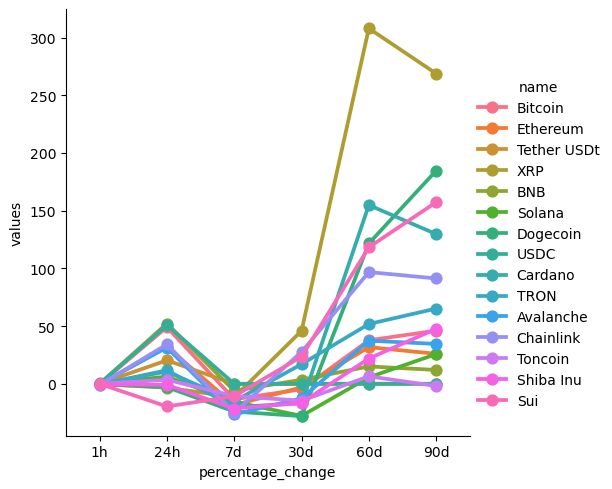

In [176]:
sns.catplot(x='percentage_change', y='values', hue='name', 
            data=df7, kind='point')


In [187]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,93196.99310,2024-12-23 19:44:57.300059
15,Bitcoin,93196.99310,2024-12-23 19:45:02.754749
